In [22]:
%matplotlib notebook
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as mpl_gs
import matplotlib.cm as cmap

import pyaccel
from pymodels import si

In [34]:
ring = si.create_accelerator()
famdata = si.get_family_data(ring)
bpms = np.array(famdata['BPM']['index']).flatten()
twi, *_ = pyaccel.optics.calc_twiss(ring)
bpmpos = twi.spos[bpms]
betx = twi.betax[bpms]
bety = twi.betay[bpms]
mux = twi.mux[bpms]/2/np.pi
muy = twi.muy[bpms]/2/np.pi

def simulate_sofb(x0, xl0, y0=0, yl0=0):
    rin = np.array([x0, xl0, y0, yl0, 0, 0])
    rout, *_ = pyaccel.tracking.linepass(ring, rin, bpms)
    return rout[0, 0,:], rout[0, 2, :]

def do_fitting(trajx, trajy):
    

In [39]:
trajx, trajy = simulate_sofb(1e-3, 0, 1e-3, 0)

<IPython.core.display.Javascript object>


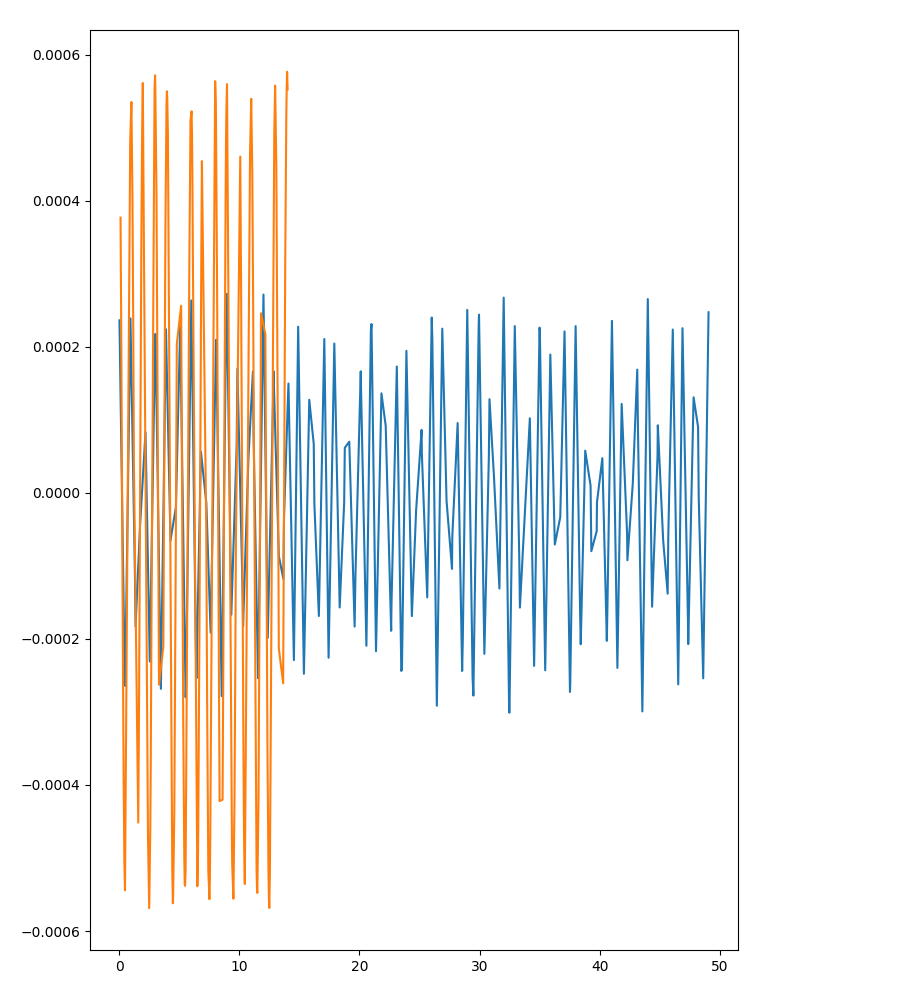

In [40]:
f  = plt.figure(figsize=(9, 10))
gs = mpl_gs.GridSpec(1, 1)
gs.update(left=0.10, right=0.82, top=0.97, bottom=0.05, hspace=0.4)
ax = plt.subplot(gs[0, 0])

ax.plot(mux, trajx/np.sqrt(betx))
ax.plot(muy, trajy/np.sqrt(bety))
f.show()

<IPython.core.display.Javascript object>


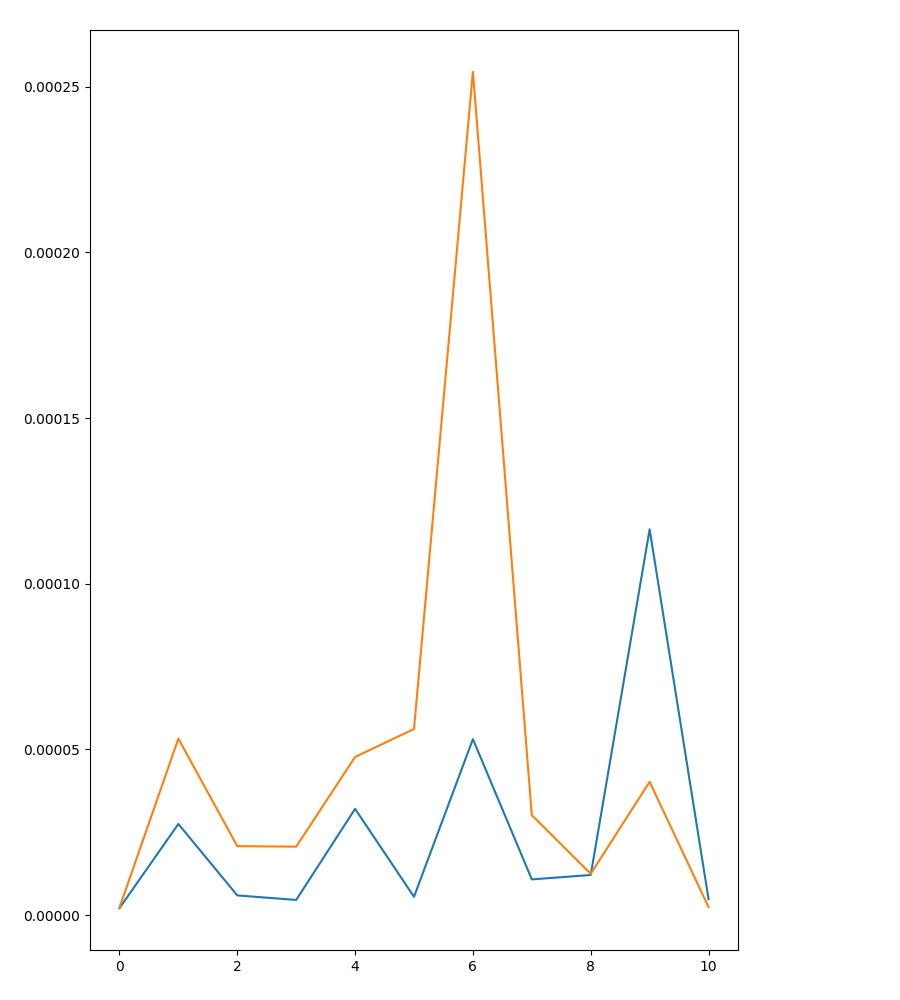

In [42]:
f  = plt.figure(figsize=(9, 10))
gs = mpl_gs.GridSpec(1, 1)
gs.update(left=0.10, right=0.82, top=0.97, bottom=0.05, hspace=0.4)
ax = plt.subplot(gs[0, 0])

ax.plot(np.abs(np.fft.rfft(trajx[::8]/np.sqrt(betx[::8])))/20)
ax.plot(np.abs(np.fft.rfft(trajy[::8]/np.sqrt(bety[::8])))/20)
f.show()

<IPython.core.display.Javascript object>


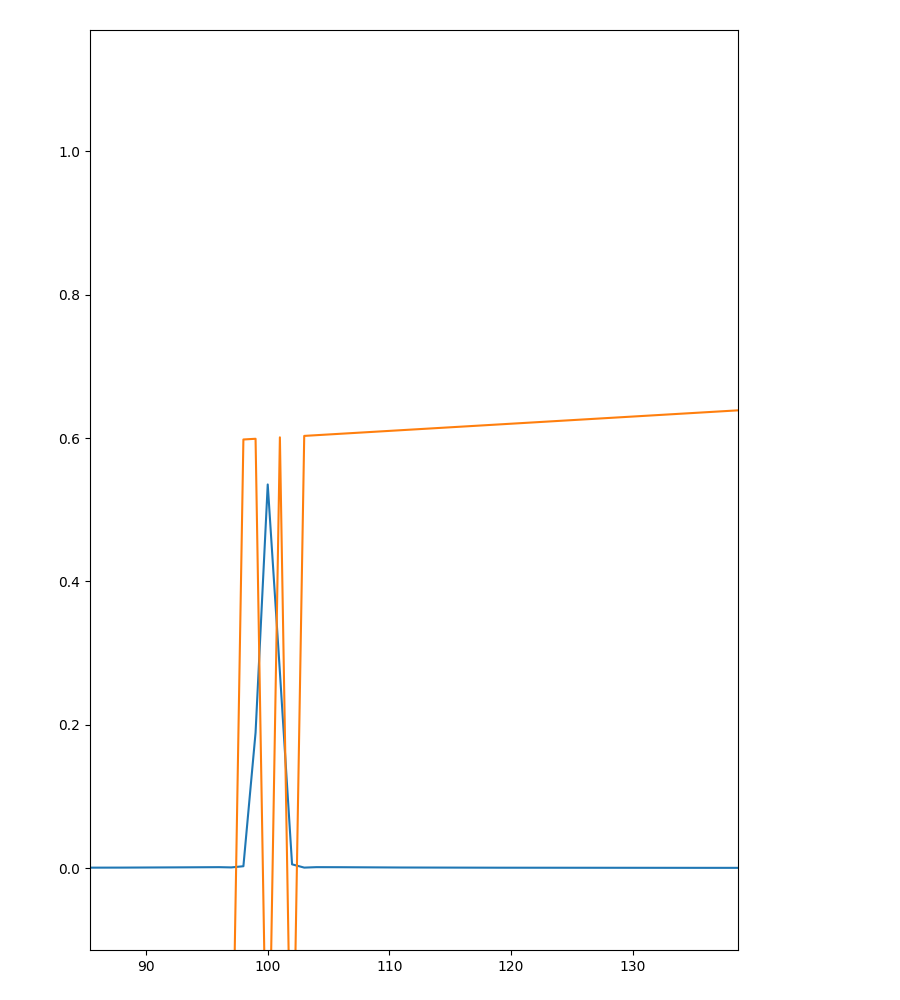

In [53]:
f  = plt.figure(figsize=(9, 10))
gs = mpl_gs.GridSpec(1, 1)
gs.update(left=0.10, right=0.82, top=0.97, bottom=0.05, hspace=0.4)
ax = plt.subplot(gs[0, 0])

n=1000
x = np.linspace(0, 100, n)
y = np.sin(2*np.pi*x)
y *= np.hamming(n)
ax.plot(np.abs(np.fft.rfft(y))/n*2)
ax.plot(np.angle(np.fft.rfft(y))/np.pi)
f.show()